EDA ASSIGNMENT

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Downloads\\BIKE DETAILS.csv")

In [4]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [5]:
# 1.Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [6]:
# 2.Check for missing values in all columns and describe your approach for handling them.
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [7]:
df.shape

(1061, 7)

In [8]:
# replacing missing values in the ex_showroom_price column  
median = df['ex_showroom_price'].median()
median

np.float64(72752.5)

In [9]:
df.fillna({'ex_showroom_price' : median}, inplace = True)

In [10]:
df['ex_showroom_price']

0        72752.5
1        72752.5
2       148114.0
3        89643.0
4        72752.5
          ...   
1056     52000.0
1057     51000.0
1058     57000.0
1059     58000.0
1060     75000.0
Name: ex_showroom_price, Length: 1061, dtype: float64

In [11]:
df['ex_showroom_price'].isnull().sum()

np.int64(0)

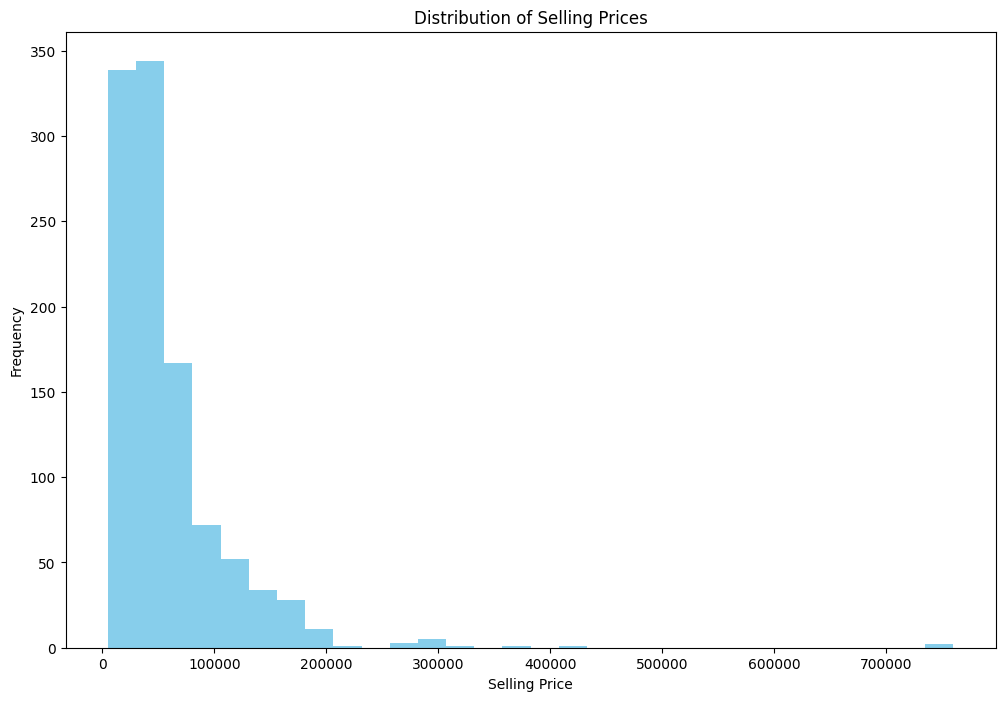

In [12]:
# 3. Plot the distribution of selling prices using a histogram and describe the overall trend.

plt.figure(figsize = (12, 8))
plt.hist(df['selling_price'], bins = 30, color = 'skyblue')
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

In [13]:
# Description
# It is right skewed
# Highest selling price is mostly between 0 - 100000

In [14]:
# 4. Create a bar pot to visualize the average selling price for each seller_type and write one observation.

avg_price_per_seller = df.groupby('seller_type')['selling_price'].mean().reset_index()
avg_price_per_seller

,seller_type,selling_price
0,Dealer,46666.666667
1,Individual,59711.923223


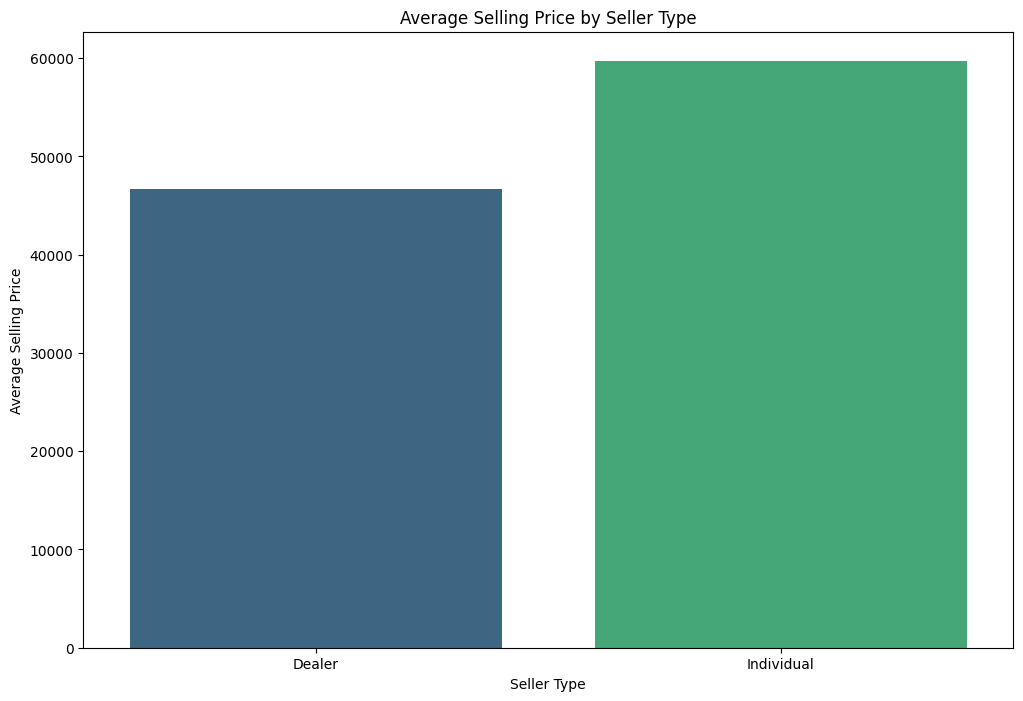

In [15]:
# bar plot

plt.figure(figsize = (12, 8))
sns.barplot(x = 'seller_type', y = 'selling_price', data = avg_price_per_seller, palette = 'viridis' )
plt.title('Average Selling Price by Seller Type')
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.show()

In [16]:
# OBSERVATION

# Individuals have a higher average selling price compared to dealers

In [17]:
# 5.  Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

avg_km_per_owner = df.groupby('owner')['km_driven'].mean().reset_index()
avg_km_per_owner

,owner,km_driven
0,1st owner,32816.583333
1,2nd owner,39288.991870
2,3rd owner,33292.181818
3,4th owner,311500.000000


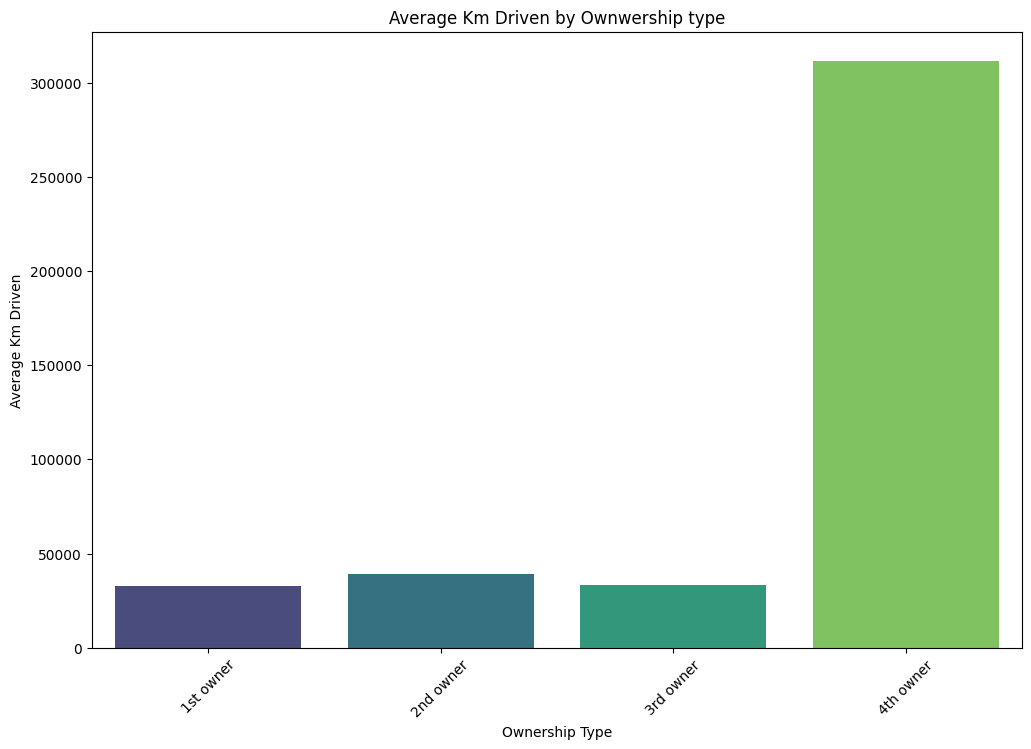

In [18]:
# bar plot

plt.figure(figsize = (12, 8))
sns.barplot(x = 'owner', y = 'km_driven', data = avg_km_per_owner, palette = 'viridis' )
plt.title('Average Km Driven by Ownwership type')
plt.xlabel("Ownership Type")
plt.ylabel("Average Km Driven")
plt.xticks(rotation = 45)
plt.show()

In [19]:
# OBSERVATION

# 2nd owners bikes are driven more than 1st and 3rd owners bike
# 4th owner category shows an abnormally high average, suggesting data quality issues

In [20]:
# 6. Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

# Summary statistics before outlier removal
print("Summary Statistics BEFORE removing outliers:\n")
print(df['km_driven'].describe())

# Detect outliers using IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter dataset (remove outliers)
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Summary statistics after outlier removal
print("\nSummary Statistics AFTER removing outliers:\n")
print(df_no_outliers['km_driven'].describe())

# Show how many rows removed
print(f"\nRows before: {len(df)}, Rows after: {len(df_no_outliers)}, Removed: {len(df) - len(df_no_outliers)}")


Summary Statistics BEFORE removing outliers:

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary Statistics AFTER removing outliers:

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Rows before: 1061, Rows after: 1022, Removed: 39


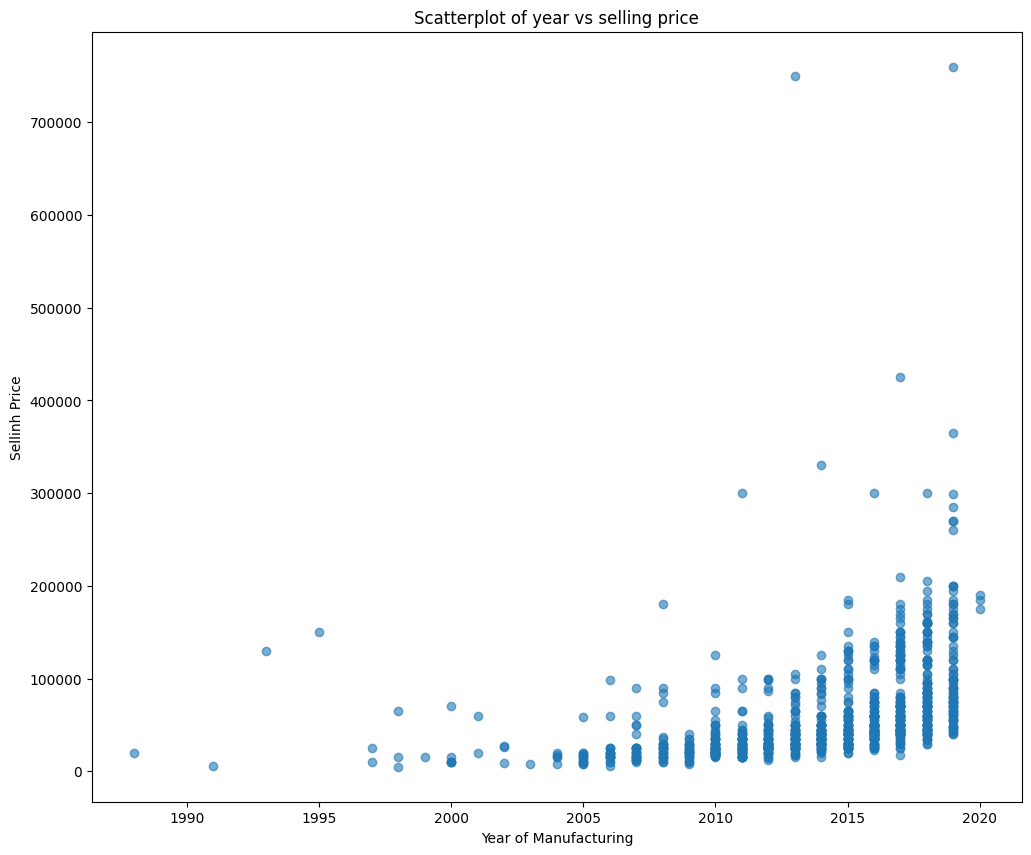

In [21]:
# 7 Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

plt.figure(figsize = (12, 10))
plt.scatter(df['year'], df['selling_price'], alpha = 0.6)
plt.title("Scatterplot of year vs selling price")
plt.xlabel("Year of Manufacturing")
plt.ylabel("Sellinh Price")
plt.show()

In [42]:
# 8. Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop="first")

# Apply encoding to seller_type column
encoded = encoder.fit_transform(df[["seller_type"]])

# Create DataFrame with encoded values
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["seller_type"]))

# Concatenate with original DataFrame (drop old column if needed)
df_encoded = pd.concat([df.drop("seller_type", axis=1), encoded_df], axis=1)

# Display first 5 rows
print(df_encoded.head())

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  \
0        350            72752.5   
1       5650            72752.5   
2      12000           148114.0   
3      23000            89643.0   
4      21000            72752.5   

                                       seller_type_1  
0  <Compressed Sparse Row sparse matrix of dtype ...  
1  <Compressed Sparse Row sparse matrix of dtype ...  
2  <Compressed Sparse Row sparse matrix of dtype ...  
3  <Compressed Sparse Row sparse matrix of dtype ...  
4  <Compressed Sparse Row sparse matrix of dtype ...  


In [45]:
df.seller_type.value_counts() # 1 = individual , 0 = dealer

seller_type
1    1055
0       6
Name: count, dtype: int64

In [44]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,1,1st owner,350,72752.5
1,Honda Dio,45000,2017,1,1st owner,5650,72752.5
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,1,2nd owner,21000,72752.5


In [47]:
df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type            int64
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

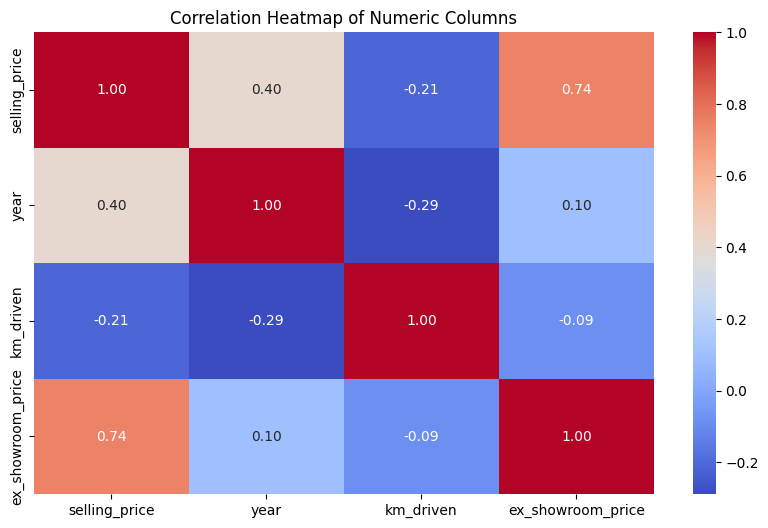

In [48]:
# 9. Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

numeric_df = df_encoded.select_dtypes(include=["int64", "float64"])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

In [ ]:
# Insights 
# selling_price and ex_showroom_price stands out most

In [ ]:
# 10. Summarize your findings in a brief report:
# ● What are the most important factors affecting a bike's selling price?
# ● Mention any data cleaning or feature engineering you performed.